# Data Preparation
This Jupyter Notebook demonstrates the steps in order to preprocess the data in order to use them after to train the models - algorithms

## 1. Importing Libraries

In [17]:
import numpy as np
import pandas as pd

## 2. Load dataset 

In [18]:
data = pd.read_csv('real_data.csv')
data.head() 

,Emotion,RGB1_R,RGB1_G,RGB1_B,RGB2_R,RGB2_G,RGB2_B,RGB3_R,RGB3_G,RGB3_B
0,Bright,229,0,13,225,225,255,253,166,74
1,Festive,229,0,13,225,225,255,255,242,0
2,Lively,229,0,13,225,225,255,26,67,155
3,Hot,229,0,13,138,112,12,255,242,0
4,Vigorous,229,0,13,255,242,0,12,32,120


In [19]:
print("Dataset shape:", data.shape)
print("Unique emotions:", data['Emotion'].unique())
# Calculate the number of unique emotions
num_unique_emotions = data['Emotion'].nunique()
print("Number of unique emotions:", num_unique_emotions)
print("Emotion distribution:\n", data['Emotion'].value_counts())

Dataset shape: (1069, 10)
Unique emotions: ['Bright' 'Festive' 'Lively' 'Hot' 'Vigorous' 'Bold' 'Forceful' 'Dynamic'
 'Dynamic and Active' 'Rich' 'Mature' 'Alluring' 'Untamed  ' 'Glossy    '
 'Fascinating' 'Luxurious ' 'Mellow ' 'Sweet ' 'Cheerful' 'Childlike'
 'Joyful ' 'Merry ' 'Colourful' 'Brilliant' 'Sweet' 'Pretty' 'Sunny  '
 'Generous' 'Sweet and Dreamy' 'Sweet - Sour' 'Cute' 'Feminine'
 'Agreeable to the touch' 'Amiable ' 'Innocent ' 'Smooth ' 'Gentle '
 'Supple ' 'Sweet and Dreamy ' 'Soft ' 'Charming' 'Smooth' 'Amiable'
 'Gentle and Elegant ' 'Mild ' 'Genteed' 'Pleasant ' 'Mild   ' 'Tender  '
 'Generous  ' 'Emotional  ' 'Casual ' 'Graceful  ' 'Gentle and Elegant'
 'Calm ' 'Sedate' 'Nostalgic' 'Japanese ' 'Elegant ' 'Sleek ' 'Delicious'
 'Nostalgic ' 'Mature ' 'Interesting' 'Diligent ' 'Alluring '
 'Extravagant' 'Mellow  ' 'Ethnic  ' 'Tasteful ' 'Rich  ' 'Luxurious'
 'Robust  ' 'Dynamic and Active ' 'Untamed ' 'Fruitful ' 'Elaborate '
 'Traditional' 'Substantial ' 'Heavy and Dee

In [20]:
# Check for duplicate rows
duplicate_rows = data[data.duplicated()]

if len(duplicate_rows) > 0:
    print("Duplicate rows found:")
    print(duplicate_rows)
    print("Total number of duplicate rows:", len(duplicate_rows))
else:
    print("No duplicate rows found.")

Duplicate rows found:
                       Emotion  RGB1_R  RGB1_G  RGB1_B  RGB2_R  RGB2_G  \
166                      Calm      149      78      29     210     168   
242                  Pleasant      234     124     104     208     194   
273   Simple Quiet and Elegant     149      78      29     161     161   
340                     Plain      208     194     142     230     245   
347                  Wholesome     215     144      92     255     250   
400               Lighthearted     153     166      74     255     250   
458                Interesting     166     151      51      47     105   
523                      Neat      191     230     200     255     255   
530                   Friendly     215     144      92     208     194   
616                     Clear      192     230     184     255     255   
634                      Quiet     222     222     222     153     194   
645            Pure and Simple     153     194     181     217     228   
689             

In [21]:
# Remove duplicate rows
data.drop_duplicates(inplace=True)

# Save the updated dataset to a new CSV file
data.to_csv('preprocess_data.csv', index=False)

# Check for duplicate rows again
duplicate_rows = data[data.duplicated()]

if len(duplicate_rows) > 0:
    print("Duplicate rows found:")
    print(duplicate_rows)
    print("Total number of duplicate rows:", len(duplicate_rows))
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [22]:
# Load the dataset
data = pd.read_csv('preprocess_data.csv')

# Group the data by RGB values and filter groups with multiple emotions
grouped_data = data.groupby(['RGB1_R', 'RGB1_G', 'RGB1_B', 'RGB2_R', 'RGB2_G', 'RGB2_B', 'RGB3_R', 'RGB3_G', 'RGB3_B'])
multiple_emotions = grouped_data.filter(lambda x: len(x['Emotion'].unique()) > 1)

if len(multiple_emotions) > 0:
    print("Rows with different emotions having the same RGB values:")
    for _, group in multiple_emotions.groupby(['RGB1_R', 'RGB1_G', 'RGB1_B', 'RGB2_R', 'RGB2_G', 'RGB2_B', 'RGB3_R', 'RGB3_G', 'RGB3_B']):
        print(group)
        print()
else:
    print("No different emotions found with the same RGB values.")

Rows with different emotions having the same RGB values:
           Emotion  RGB1_R  RGB1_G  RGB1_B  RGB2_R  RGB2_G  RGB2_B  RGB3_R  \
661  Intellectual        4      36      65     222     222     222     116   
976       Youthful       4      36      65     222     222     222     116   

     RGB3_G  RGB3_B  
661     139     116  
976     139     116  

                Emotion  RGB1_R  RGB1_G  RGB1_B  RGB2_R  RGB2_G  RGB2_B  \
1030  Strong and Robust      53      21       3     145     111      93   
1032           Metallic      53      21       3     145     111      93   

      RGB3_R  RGB3_G  RGB3_B  
1030       0       0       0  
1032       0       0       0  

        Emotion  RGB1_R  RGB1_G  RGB1_B  RGB2_R  RGB2_G  RGB2_B  RGB3_R  \
691       Pure       57      89     153     255     255     255     103   
692  Refreshing      57      89     153     255     255     255     103   

     RGB3_G  RGB3_B  
691     195     183  
692     195     183  

         Emotion  RGB1_R  RG

In [23]:
# Load the dataset
data = pd.read_csv('real_data.csv')

# Remove leading/trailing spaces from column names and values
data.columns = data.columns.str.strip()
data = data.apply(lambda x: x.strip() if isinstance(x, str) else x)

# Combine the three RGB sets into a single identifier
data['RGB_Identifier'] = data.apply(lambda row: (row['RGB1_R'], row['RGB1_G'], row['RGB1_B'],
                                                 row['RGB2_R'], row['RGB2_G'], row['RGB2_B'],
                                                 row['RGB3_R'], row['RGB3_G'], row['RGB3_B']), axis=1)

# Check for duplicates
duplicate_rgb = data.duplicated(subset=['RGB_Identifier'], keep=False)

# Display the rows with duplicate RGB sets
duplicates = data[duplicate_rgb].sort_values(by='RGB_Identifier')

# Check if any duplicates exist and print the result
if not duplicates.empty:
    print("Found emotions with the same RGB values:")
    print("Count of duplicates: ", len(duplicates))
    print(duplicates[['Emotion', 'RGB1_R', 'RGB1_G', 'RGB1_B', 'RGB2_R', 'RGB2_G', 'RGB2_B', 'RGB3_R', 'RGB3_G', 'RGB3_B']])
else:
    print("No duplicate RGB sets found across different emotions.")

duplicates.head()

# Remove duplicates, keeping only the first occurrence
data_cleaned = data.drop_duplicates(subset=['RGB_Identifier'], keep='first')

# Select only the specified columns
data_cleaned = data_cleaned[['Emotion', 'RGB1_R', 'RGB1_G', 'RGB1_B', 'RGB2_R', 'RGB2_G', 'RGB2_B', 'RGB3_R', 'RGB3_G', 'RGB3_B']]

# Display the cleaned data
print("\nCleaned data without duplicates:")
print(data_cleaned)

# Save the cleaned data to a new CSV file
data_cleaned.to_csv('real_data_cleaned.csv', index=False)

# Optional: Display the cleaned data with the duplicates removed
print("\nDuplicates removed, displaying first few rows of the cleaned data:")
print(data_cleaned.head())

duplicates.head()

Found emotions with the same RGB values:
Count of duplicates:  159
                Emotion  RGB1_R  RGB1_G  RGB1_B  RGB2_R  RGB2_G  RGB2_B  \
1010           Youthful       4      36      65     222     222     222   
673       Intellectual        4      36      65     222     222     222   
1067           Metallic      53      21       3     145     111      93   
1065  Strong and Robust      53      21       3     145     111      93   
704               Pure       57      89     153     255     255     255   
...                 ...     ...     ...     ...     ...     ...     ...   
816              Tender     251     174     193     253     217     205   
134             Sunny       253     192     145     254     230     194   
327            Healthy      253     192     145     254     230     194   
418            Charming     253     217     205     255     255     255   
37            Innocent      253     217     205     255     255     255   

      RGB3_R  RGB3_G  RGB3_B  
1

,Emotion,RGB1_R,RGB1_G,RGB1_B,RGB2_R,RGB2_G,RGB2_B,RGB3_R,RGB3_G,RGB3_B,RGB_Identifier
1010,Youthful,4,36,65,222,222,222,116,139,116,"(4, 36, 65, 222, 222, 222, 116, 139, 116)"
673,Intellectual,4,36,65,222,222,222,116,139,116,"(4, 36, 65, 222, 222, 222, 116, 139, 116)"
1067,Metallic,53,21,3,145,111,93,0,0,0,"(53, 21, 3, 145, 111, 93, 0, 0, 0)"
1065,Strong and Robust,53,21,3,145,111,93,0,0,0,"(53, 21, 3, 145, 111, 93, 0, 0, 0)"
704,Pure,57,89,153,255,255,255,103,195,183,"(57, 89, 153, 255, 255, 255, 103, 195, 183)"


In [24]:
# Load the dataset
data = pd.read_csv('real_data_cleaned.csv')

# Strip leading and trailing spaces from all columns
data = data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

data.head() 

,Emotion,RGB1_R,RGB1_G,RGB1_B,RGB2_R,RGB2_G,RGB2_B,RGB3_R,RGB3_G,RGB3_B
0,Bright,229,0,13,225,225,255,253,166,74
1,Festive,229,0,13,225,225,255,255,242,0
2,Lively,229,0,13,225,225,255,26,67,155
3,Hot,229,0,13,138,112,12,255,242,0
4,Vigorous,229,0,13,255,242,0,12,32,120


#### Check that we don't have Multi-label Classification Problem 

In [25]:
import pandas as pd

# Φόρτωση του dataset
data = pd.read_csv('real_data_cleaned.csv')

# Αφαίρεση κενών από τις ονομασίες των στηλών και τις τιμές
data.columns = data.columns.str.strip()
data = data.apply(lambda x: x.strip() if isinstance(x, str) else x)

# Συνδυασμός των τριών RGB σετ σε ένα μοναδικό αναγνωριστικό
data['RGB_Identifier'] = data.apply(lambda row: (row['RGB1_R'], row['RGB1_G'], row['RGB1_B'],
                                                 row['RGB2_R'], row['RGB2_G'], row['RGB2_B'],
                                                 row['RGB3_R'], row['RGB3_G'], row['RGB3_B']), axis=1)

# Έλεγχος για πολυετικέτα ταξινόμηση
multi_label_check = data.groupby('RGB_Identifier')['Emotion'].nunique()

# Εύρεση των RGB τιμών που αντιστοιχούν σε περισσότερες από μία συναισθηματικές κατηγορίες
multi_label_rgb = multi_label_check[multi_label_check > 1]

# Εμφάνιση των αποτελεσμάτων
if not multi_label_rgb.empty:
    print("Βρέθηκαν RGB τιμές που αντιστοιχούν σε περισσότερες από μία συναισθηματικές κατηγορίες:")
    print(multi_label_rgb)
else:
    print("Κάθε σετ τιμών RGB αντιστοιχεί σε μία και μόνο συναισθηματική κατηγορία (Emotion).")

Κάθε σετ τιμών RGB αντιστοιχεί σε μία και μόνο συναισθηματική κατηγορία (Emotion).


In [26]:
# Count the number of occurrences of each distinct emotion
emotion_counts = data['Emotion'].value_counts()

print("Counts of each emotion:")
print(emotion_counts)

# Count the number of distinct emotions
distinct_emotion_count = data['Emotion'].nunique()

print("Number of distinct emotions:")
print(distinct_emotion_count)

distinct_emotion_count.head()

Counts of each emotion:
Emotion
Masculine                9
Urbane                   8
Alluring                 8
Subtle and Mysterious    7
Smart                    7
                        ..
Fruitful                 1
Dynamic and Active       1
Robust                   1
Vivid                    1
Striking                 1
Name: count, Length: 366, dtype: int64
Number of distinct emotions:
366


In [27]:
# Filter out only single-word emotions
single_word_emotions = data['Emotion'].str.split().apply(lambda x: len(x) == 1)

# Count the occurrences of each single-word emotion
emotion_counts = data[single_word_emotions]['Emotion'].value_counts()

print("Counts of each single-word emotion:")
print(emotion_counts)

# Calculate the total count of all single-word emotions
total_single_word_emotions = emotion_counts.sum()
print("\nTotal count of single-word emotions:", total_single_word_emotions)

Counts of each single-word emotion:
Emotion
Masculine     9
Urbane        8
Alluring      8
Brilliant     7
Untamed       7
             ..
Delicious     1
Relaxed       1
Open          1
Dynamic       1
Striking      1
Name: count, Length: 334, dtype: int64

Total count of single-word emotions: 892


In [28]:
# Extract distinct values from the 'Emotion' column
distinct_emotions = data['Emotion'].unique()

print("Distinct values in the 'Emotion' column:")
for emotion in distinct_emotions:
    print(emotion)

Distinct values in the 'Emotion' column:
Bright
Festive
Lively
Hot
Vigorous
Bold
Forceful
Dynamic
Dynamic and Active
Rich
Mature
Alluring
Untamed  
Glossy    
Fascinating
Luxurious 
Mellow 
Sweet 
Cheerful
Childlike
Joyful 
Merry 
Colourful
Brilliant
Sweet
Pretty
Sunny  
Generous
Sweet and Dreamy
Sweet - Sour
Cute
Feminine
Agreeable to the touch
Amiable 
Innocent 
Smooth 
Gentle 
Supple 
Sweet and Dreamy 
Soft 
Charming
Smooth
Amiable
Gentle and Elegant 
Mild 
Genteed
Pleasant 
Mild   
Tender  
Generous  
Emotional  
Casual 
Graceful  
Gentle and Elegant
Calm 
Sedate
Nostalgic
Japanese 
Elegant 
Sleek 
Delicious
Nostalgic 
Mature 
Interesting
Diligent 
Alluring 
Extravagant
Mellow  
Ethnic  
Tasteful 
Rich  
Luxurious
Robust  
Dynamic and Active 
Untamed 
Fruitful 
Elaborate 
Traditional
Substantial 
Heavy and Deep 
Old - Fashioned
Wild  
Serious 
Strong and Robust
Dazzling 
Flamboyant
Forceful 
Abundant 
Tropical 
Casual
Enjoyable
Delicious 
Aromatic 
Abundant
Enjoyable 
Untamed
Frien

#### Normalise data 

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

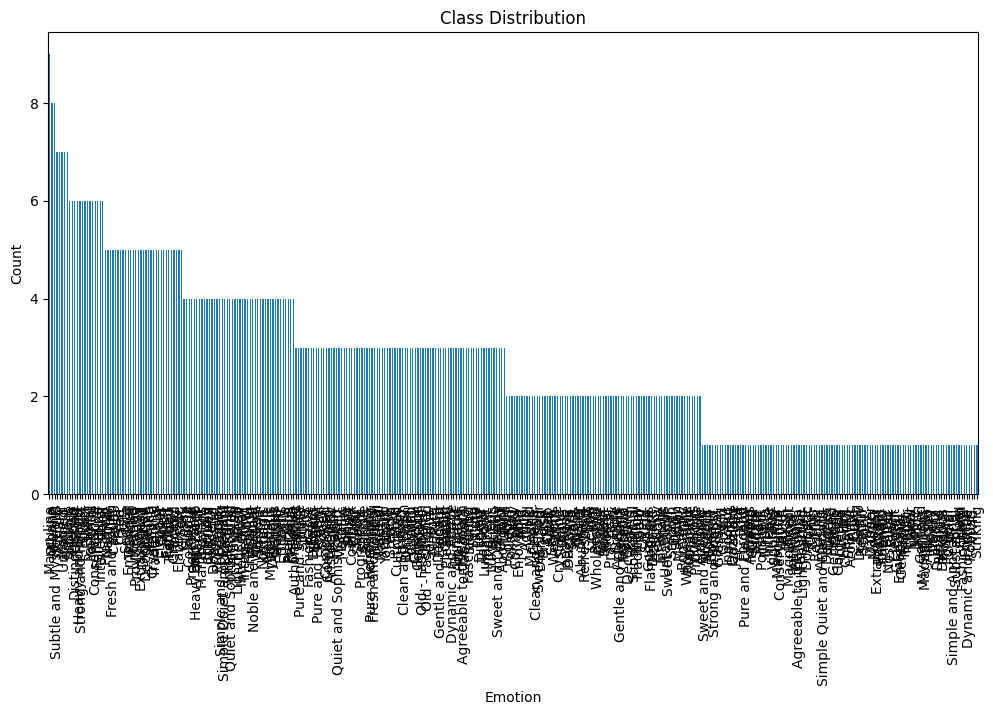

In [30]:
import matplotlib.pyplot as plt

# Plot class distribution
plt.figure(figsize=(12, 6))
data['Emotion'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE

# Load the dataset
df = pd.read_csv('real_data.csv')

# Encode the categorical labels
le = LabelEncoder()
df['Emotion'] = le.fit_transform(df['Emotion'])

# Feature Engineering: Aggregating RGB values
df['RGB1_sum'] = df['RGB1_R'] + df['RGB1_G'] + df['RGB1_B']
df['RGB2_sum'] = df['RGB2_R'] + df['RGB2_G'] + df['RGB2_B']
df['RGB3_sum'] = df['RGB3_R'] + df['RGB3_G'] + df['RGB3_B']

# Update feature set
X = df[['RGB1_sum', 'RGB2_sum', 'RGB3_sum']].values
y = df['Emotion'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the minimum class size in the training set
min_class_size = min(np.bincount(y_train))
print(f"Minimum class size: {min_class_size}")

# Handle class imbalance with SMOTE
smote = SMOTE(sampling_strategy='auto', k_neighbors=min(5, min_class_size-1), random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVC model with class weights
svc = SVC(kernel='rbf', C=1.0, gamma='scale', class_weight='balanced')
svc.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = svc.predict(X_test)

# Print the evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf'],
    'class_weight': ['balanced']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

# Evaluate the best estimator
best_svc = grid.best_estimator_
y_pred_best = best_svc.predict(X_test)

print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


Minimum class size: 0


InvalidParameterError: The 'k_neighbors' parameter of SMOTE must be an int in the range [1, inf) or an object implementing 'kneighbors' and 'kneighbors_graph'. Got -1 instead.